# Análisis Exploratorio de datos

In [4]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 49.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939433 sha256=70d4c8df307cf80e2a2183efca8e40694d46776055db5fa5ff16bf1402213c68
  Stored in directory: /root/.cache/pip/wheels/6b/86/a7/f71cb84c7bff804d83e293615a20c0531234397b796aee2645
Successfully built pydataset


In [6]:
from pydataset import data

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

initiated datasets repo at: /root/.pydataset/


In [7]:
iris = data('iris')

In [8]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [10]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [11]:
q = [0.25, 0.75]
iris.quantile(q)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0.25,5.1,2.8,1.6,0.3
0.75,6.4,3.3,5.1,1.8


In [12]:
iris['Species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: Species, dtype: object

In [13]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
iris.shape

(150, 5)

In [15]:
iris.columns = iris.columns.str.replace('Width','W')
iris.columns = iris.columns.str.replace('Length','L')
pd.pivot_table(iris,index='Species',aggfunc=[np.mean,np.median,np.std])

mean                          median                          \
           Petal.L Petal.W Sepal.L Sepal.W Petal.L Petal.W Sepal.L Sepal.W   
Species                                                                      
setosa       1.462   0.246   5.006   3.428    1.50     0.2     5.0     3.4   
versicolor   4.260   1.326   5.936   2.770    4.35     1.3     5.9     2.8   
virginica    5.552   2.026   6.588   2.974    5.55     2.0     6.5     3.0   

                 std                                
             Petal.L   Petal.W   Sepal.L   Sepal.W  
Species                                             
setosa      0.173664  0.105386  0.352490  0.379064  
versicolor  0.469911  0.197753  0.516171  0.313798  
virginica   0.551895  0.274650  0.635880  0.322497

In [16]:
iris.groupby('Species').describe()

Sepal.L                                             Sepal.W         \
             count   mean       std  min    25%  50%  75%  max   count   mean   
Species                                                                         
setosa        50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8    50.0  3.428   
versicolor    50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0    50.0  2.770   
virginica     50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9    50.0  2.974   

            ... Petal.L      Petal.W                                            
            ...     75%  max   count   mean       std  min  25%  50%  75%  max  
Species     ...                                                                 
setosa      ...   1.575  1.9    50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  ...   4.600  5.1    50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   ...   5.875  6.9    50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [17]:
iris.groupby('Species').quantile([0.25,0.5,0.95])

Sepal.L  Sepal.W  Petal.L  Petal.W
Species                                            
setosa     0.25    4.800    3.200    1.400    0.200
           0.50    5.000    3.400    1.500    0.200
           0.95    5.610    4.055    1.700    0.400
versicolor 0.25    5.600    2.525    4.000    1.200
           0.50    5.900    2.800    4.350    1.300
           0.95    6.755    3.200    4.900    1.600
virginica  0.25    6.225    2.800    5.100    1.800
           0.50    6.500    3.000    5.550    2.000
           0.95    7.700    3.510    6.655    2.455

In [18]:
interquantile = lambda x: x.quantile(0.75)-x.quantile(0.25)

In [19]:
f = {'Petal.L' : ['min','max','median', interquantile ], 'Petal.W':['mean','std']}

In [20]:
iris.groupby('Species').agg(f)

Petal.L                        Petal.W          
               min  max median <lambda_0>    mean       std
Species                                                    
setosa         1.0  1.9   1.50      0.175   0.246  0.105386
versicolor     3.0  5.1   4.35      0.600   1.326  0.197753
virginica      4.5  6.9   5.55      0.775   2.026  0.274650

In [21]:
f ={'min':np.min,'max':np.max,'median': np.median,'IQ' : interquantile}
f ={'median', 'mean','std'}
iris.groupby('Species').agg(f)

Sepal.L                  Sepal.W                  Petal.L  \
              mean       std median    mean       std median    mean   
Species                                                                
setosa       5.006  0.352490    5.0   3.428  0.379064    3.4   1.462   
versicolor   5.936  0.516171    5.9   2.770  0.313798    2.8   4.260   
virginica    6.588  0.635880    6.5   2.974  0.322497    3.0   5.552   

                            Petal.W                   
                 std median    mean       std median  
Species                                               
setosa      0.173664   1.50   0.246  0.105386    0.2  
versicolor  0.469911   4.35   1.326  0.197753    1.3  
virginica   0.551895   5.55   2.026  0.274650    2.0

In [22]:
iris.groupby('Species').mean()

,Sepal.L,Sepal.W,Petal.L,Petal.W
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


## Visualizacion

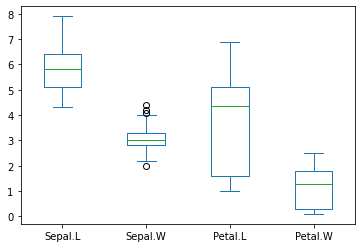

In [23]:

iris.plot(kind='box')
plt.show()

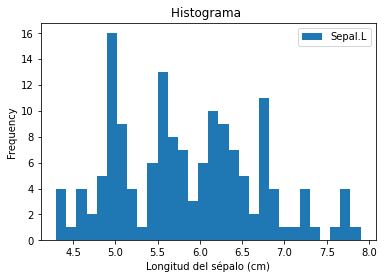

In [24]:
iris.plot(y='Sepal.L',kind='hist' ,bins=30)
plt.xlabel('Longitud del sépalo (cm)')
plt.title('Histograma ')
plt.show()

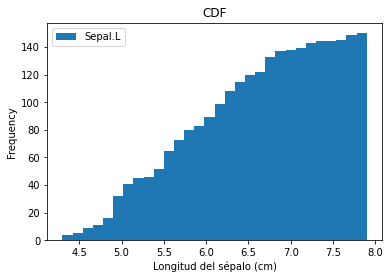

In [25]:
iris.plot(y='Sepal.L',kind='hist' ,bins=30, cumulative=True)
plt.xlabel('Longitud del sépalo (cm)')
plt.title('CDF')
plt.show()

In [26]:
iris['Color']='red' # Nueva columna con el color
iris.loc[iris.Species == "setosa",'Color']='green'
iris.loc[iris.Species == "versicolor",'Color']='blue'
iris.head()

,Sepal.L,Sepal.W,Petal.L,Petal.W,Species,Color
1,5.1,3.5,1.4,0.2,setosa,green
2,4.9,3.0,1.4,0.2,setosa,green
3,4.7,3.2,1.3,0.2,setosa,green
4,4.6,3.1,1.5,0.2,setosa,green
5,5.0,3.6,1.4,0.2,setosa,green


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


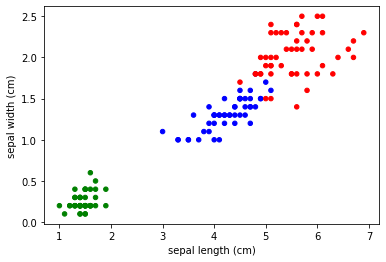

In [27]:
iris.plot(x='Petal.L', y='Petal.W',
          c=iris.Color,kind='scatter')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()